In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
path = os.getcwd() + '/ex1data1.txt'  
data = pd.read_csv(path, names=['Population', 'Profit'])  

data.head(n=10)  

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [55]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [56]:
def cost_function(X, y, theta):
    inner = np.power((X * theta.T) - y, 2)
    return np.sum(inner) / (2 * len(X))

In [57]:
# insert a column of 1s at the beginning of the data frame in order to make the matrix operations work correctly.
# It gets multiplied with the y intercept term
# [X0 X1.. Xn] x [theta 0]
#                [theta 1]
#                [theta n]
data.insert(0, 'First', 1)

In [58]:
# Number of columns in the data frame
cols = data.shape[1]

In [59]:
X = data.iloc[:,0:cols-1]   
y = data.iloc[:,cols-1:cols]  
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0])) 

In [60]:
def normal_equation(X, y):
    '''
    Calculate the parameters (theta) using the normal approximation method
    '''
    return (X.T * X).I * (X.T * y)

In [61]:
def gradient_descent(X, y, theta, alpha, iters):
    '''
    Calculate the parameters (theta) using the gradient descent method
    '''
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    
    # Store the cost calculated for all coefficents in a Matrix
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            # derivate term
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = cost_function(X, y, theta)

    return theta, cost


In [62]:
%%latex
Gradient Descent

\begin{align}
\theta_j = \theta_j – \alpha \cdot \frac{ \sum_i^m \left(H_{\theta}\left(x\right) – y\right) \cdot x_j } { m }
\end{align}

<IPython.core.display.Latex object>

In [63]:
learning_rate = 0.01  
iters = 2500

# g Matrix has the optimal values for theta0 and theta1
# cost Matrix has all the values of cost calculated for thetas during gradient descent
g, cost = gradient_descent(X, y, theta, learning_rate, iters)

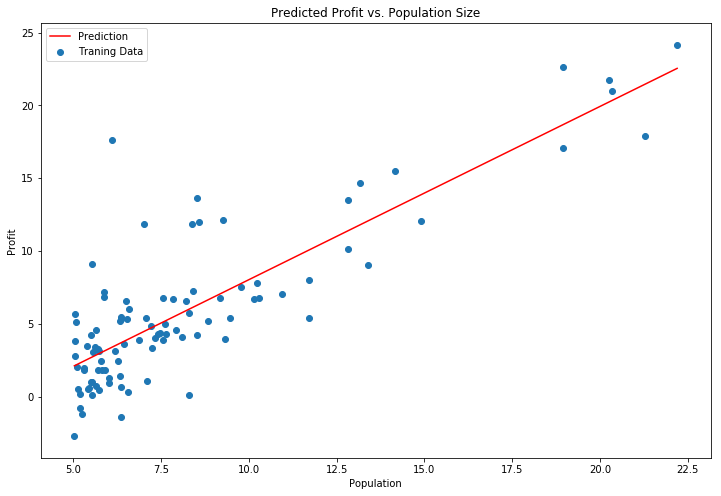

In [64]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  

# y = mx + c
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

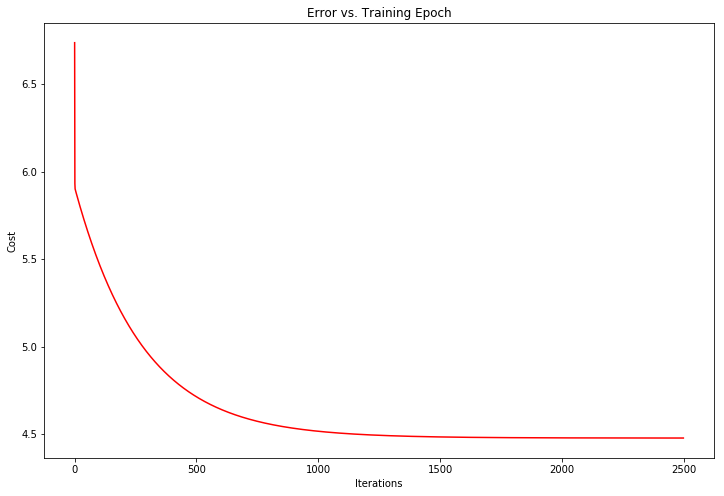

In [65]:
# Illustration of a good learning rate
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

In [66]:
def compute_r_squared(y, g):
    y_mean = np.sum(y) / len(y)
    all_costs = X * g.T
    
    ssr = np.sum(np.power((all_costs - y_mean), 2))
    sst = np.sum(np.power((y - y_mean), 2))
    
    return float(ssr) / sst * 100

print(compute_r_squared(y, g), "%")



69.687641413 %


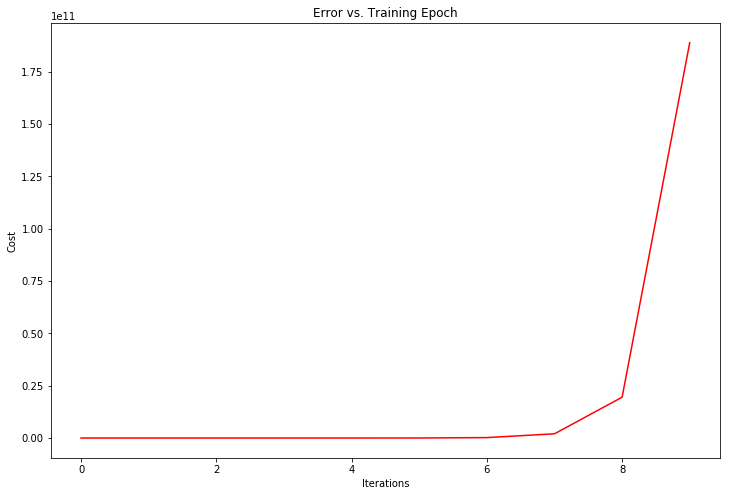

In [67]:
# If the learning rate (alpha) is too high, the minimum point is overshot during gradient descent
learning_rate = 0.05  
iters = 10

g, cost = gradient_descent(X, y, theta, learning_rate, iters)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 